# Questions to be Answered

1. ROI top 20%, 30%, or 50% against all with risky loans
2. Default rate for these things

In [30]:
%pylab inline
from sklearn.externals import joblib
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
from patsy import dmatrices
import sys
sys.path.append("../scripts")

Populating the interactive namespace from numpy and matplotlib


In [69]:
def generate_roc(X, y, model):
    """
    Takes a vector of features, X, a vector of targets, y and draws an
    ROC along with AUC scores.

    :param X: (K x N) Numpy array
    :param y: N x 1 numpy array
    :param model: an sklearn ALREADY FITTED classifer
    :return:

    Notes
    ---
    - Meant to be run in pylab inline mode.
    - Only works with classification models.

    """

    # Calculate necessary values
    y_pred = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='ROC Curve. AUC = {0:.2f}'.format(auc))

    # Plot our 45 degree line and make it a dashed dot
    plt.plot([0, 1], [0, 1], 'r--')

    # Axis work
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

In [33]:
model = joblib.load('../model/rf_model.pkl')

In [34]:
df = pd.read_pickle('../cleaned_df.pkl')

In [35]:
from model import create_matrix

In [36]:
y, X = create_matrix(df)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                   random_state=42)

In [54]:
type(model)

sklearn.ensemble.forest.RandomForestClassifier

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


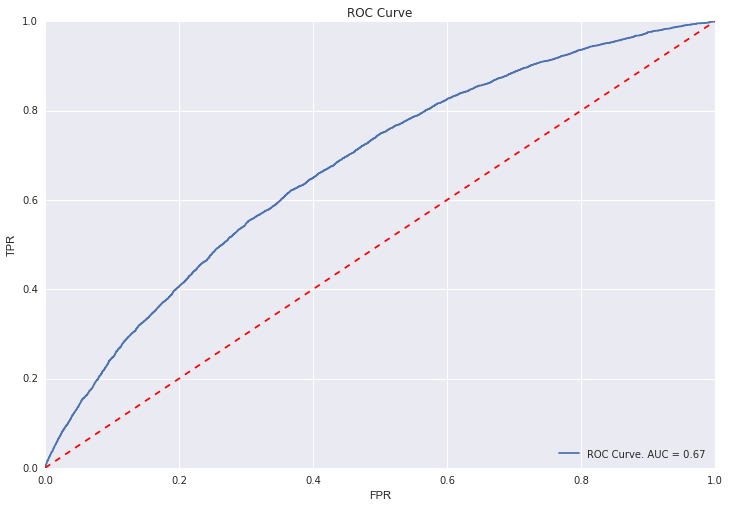

In [70]:
generate_roc(X_test, y_test, model=model)

#  